# 作业1.4
### 根据所给的训练数据集进行分类

In [1]:
import numpy as np
import pandas as pd

## 加载数据

In [2]:
def create_data(fileName):
    columeLabel = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
    dataset = pd.read_csv(fileName, sep='\t', header=None, index_col=False, names=columeLabel)
    data = np.array(dataset)
    return data[:, :-1], data[:, -1], dataset

## 加载训练数据

In [3]:
X_train, y_train, trainDataset = create_data('homework_1.4_trainingDataset.txt')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

import os
os.environ["PATH"] += os.pathsep + 'E:/DevSoft/Graphviz2.38/bin'

## 采用CART算法

In [5]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 可视化决策树

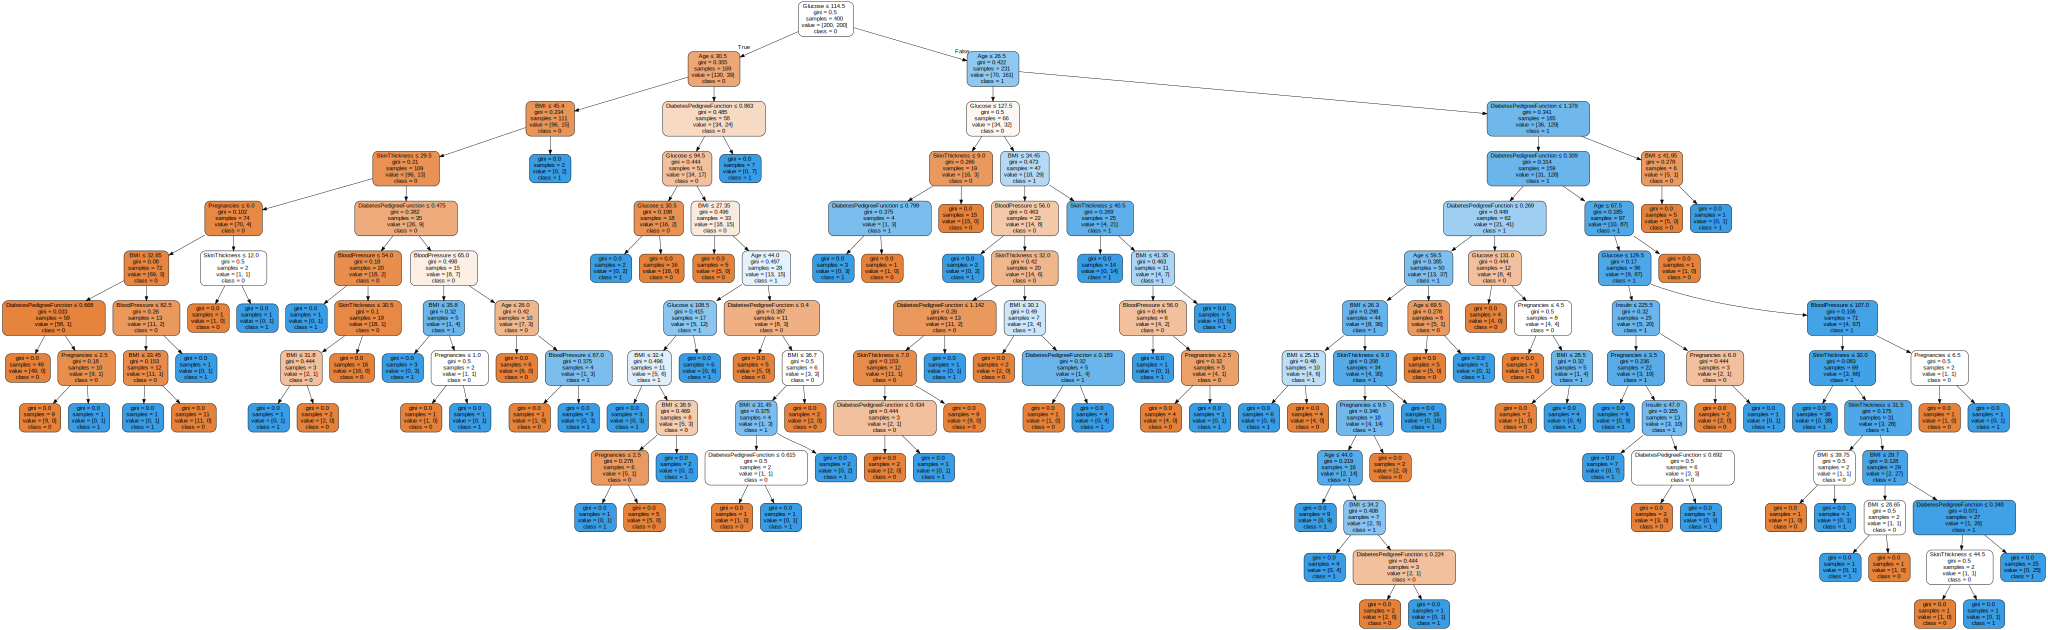

In [6]:
data_feature_name = trainDataset.columns[:-1]
data_target_name = [ str(x) for x in np.unique(trainDataset[trainDataset.columns[-1]])]
dot_tree = export_graphviz(model_tree, out_file='homework_1.4_tree.pdf' ,feature_names=data_feature_name,
                           class_names=data_target_name ,filled=True, rounded=True,special_characters=True)

#import pydotplus
#graph = pydotplus.graph_from_dot_data(dot_tree)
#graph.write_pdf('homework_1.4_tree.pdf')

with open('homework_1.4_tree.pdf') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 对测试数据进行验证

In [7]:
X_test, y_test, testDataset = create_data('homework_1.4_testDataset.txt')

In [8]:
model_tree.score(X_test, y_test)

0.77